# Create Your Own Colormap<a id='top'></a>

- Detailed reference document of the VCS colormap can be found at [here](https://uvcdat.llnl.gov/docs/vcs/misc/colormap.html).
- Let's create your own VCS colormap.
- [Download ipynb file](#Color_map_create_own.ipynb)


<div align='right'>Tutorial written by Jiwoo Lee (Oct. 2017)</div>
<div align='right'>Colormap for example 4 provided by Karl Taylor</div>

## Contents

- [Import modules](#modules)
- [Prepare a dummy array](#dummy)
- [Create a colormap](#create)
- [Alternative way of creating own colormaps](#alter)
- [Define name and colors for your own colormap](#owncm)
    - [Example 1](#ex1)
    - [Example 2](#ex2)
    - [Example 3](#ex3)
    - [Example 4](#ex4)

## Import modules<a id='modules'></a>
([back to top](#top))

In [1]:
import vcs
import MV2
from matplotlib.colors import LinearSegmentedColormap

## Prepare a dummy array<a id='dummy'></a>
([back to top](#top))
- Here I prepare a dummy 2D array (240 x 2), which is being used in this tutorial only for the visualization purpose.

In [2]:
a = []

num_levels = 240

for i in range(0,num_levels):
  a.append(i/float(num_levels))

for i in range(0,num_levels):
  a.append(i/float(num_levels))

a = MV2.array(a)
a = MV2.reshape(a, (-1,num_levels))

a.id = 'dummy'

v = vcs.init()

## Create a colormap<a id='create'></a>
([back to top](#top))
- List of VCS default colormaps can be shown using `vcs.listelements('colormap')`

In [3]:
vcs.listelements('colormap')

['AMIP',
 'NCAR',
 'bl_to_darkred',
 'bl_to_drkorang',
 'blends',
 'blue2darkorange',
 'blue2darkred',
 'blue2green',
 'blue2grey',
 'blue2orange',
 'blue2orange2red',
 'blue_to_grey',
 'blue_to_grn',
 'blue_to_orange',
 'blue_to_orgred',
 'brown2blue',
 'brown_to_blue',
 'categorical',
 'classic',
 'default',
 'green2magenta',
 'grn_to_magenta',
 'inferno',
 'lightblue2darkblue',
 'ltbl_to_drkbl',
 'magma',
 'plasma',
 'rainbow',
 'rainbow_no_grn',
 'rainbownogreen',
 'sequential',
 'viridis',
 'white2blue',
 'white2green',
 'white2magenta',
 'white2red',
 'white2yellow',
 'white_to_blue',
 'white_to_green',
 'white_to_magenta',
 'white_to_red',
 'white_to_yellow']

- You can create your own colormap by using [`createcolormap`](https://uvcdat.llnl.gov/docs/vcs/Canvas.html?highlight=createcolormap#vcs.Canvas.Canvas.createcolormap)
- Let's make one named 'my_cmap'. Now you will see that one is included in the list of available colormaps
- Note that 'my_cmap' colormap is copy of the default colormap at the begining

In [4]:
v.createcolormap('my_cmap')
vcs.listelements('colormap')

['AMIP',
 'NCAR',
 'bl_to_darkred',
 'bl_to_drkorang',
 'blends',
 'blue2darkorange',
 'blue2darkred',
 'blue2green',
 'blue2grey',
 'blue2orange',
 'blue2orange2red',
 'blue_to_grey',
 'blue_to_grn',
 'blue_to_orange',
 'blue_to_orgred',
 'brown2blue',
 'brown_to_blue',
 'categorical',
 'classic',
 'default',
 'green2magenta',
 'grn_to_magenta',
 'inferno',
 'lightblue2darkblue',
 'ltbl_to_drkbl',
 'magma',
 'my_cmap',
 'plasma',
 'rainbow',
 'rainbow_no_grn',
 'rainbownogreen',
 'sequential',
 'viridis',
 'white2blue',
 'white2green',
 'white2magenta',
 'white2red',
 'white2yellow',
 'white_to_blue',
 'white_to_green',
 'white_to_magenta',
 'white_to_red',
 'white_to_yellow']

- Set colormap for the canvas by using [`setcolormap`](https://uvcdat.llnl.gov/docs/vcs/Canvas.html?highlight=setcolormap#vcs.Canvas.Canvas.setcolormap) of VCS

In [5]:
v.setcolormap('my_cmap')

- Let's make the colormap palette as pure white first
- Note that 'my_cmap' colormap is copy of the default colormap at the beginning

In [6]:
for i in range(0,240):
    v.setcolorcell(i,100,100,100)

- Assign colors with index number to 'my_cmap' using [`setcolormap`](https://uvcdat.llnl.gov/docs/vcs/Canvas.html?highlight=setcolorcell#vcs.Canvas.Canvas.setcolorcell) of VCS
- Below example colors are given from [here](http://www.december.com/html/spec/color16codes.html)

In [7]:
v.setcolorcell(0,0,0,0) # black
v.setcolorcell(1,50,50,50) # gray
v.setcolorcell(2,75,75,75) # silver
v.setcolorcell(3,100,100,100) # white
v.setcolorcell(4,50,0,0) # maroon
v.setcolorcell(5,100,0,0) # red
v.setcolorcell(6,50,50,0) # olive
v.setcolorcell(7,100,100,0) # yellow
v.setcolorcell(8,0,50,0) # green
v.setcolorcell(9,0,100,0) # lime
v.setcolorcell(10,0,50,50) # teal
v.setcolorcell(11,0,100,100) # aqua
v.setcolorcell(12,0,0,50) # navy
v.setcolorcell(13,0,0,100) # blue
v.setcolorcell(14,50,0,50) # purple
v.setcolorcell(15,100,0,100) # fuchsia

- Use `box.color_1` and `box.color_2` of `boxfill` to set starting and ending colors

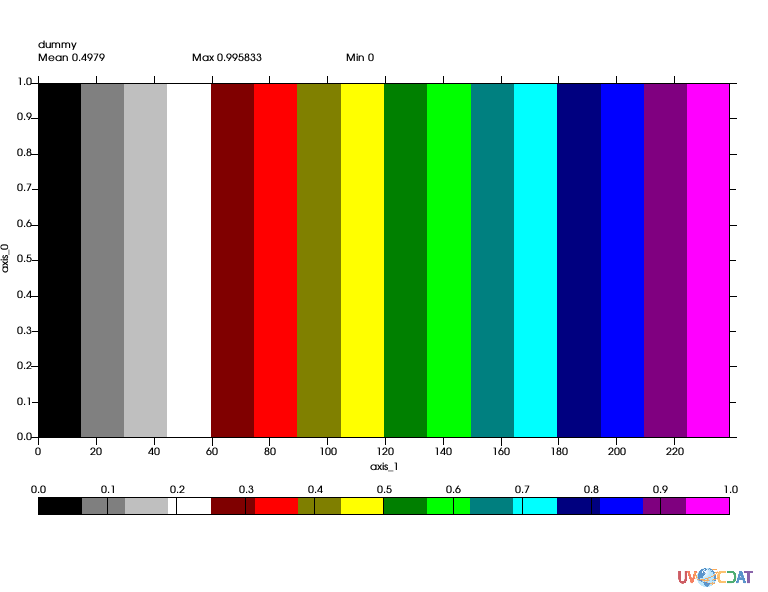

In [8]:
box = v.createboxfill()
box.color_1 = 0
box.color_2 = 15
box.colormap = 'my_cmap'
v.plot(a,box)

## Alternative way of creating own colormaps<a id='alter'><a>
([back to top](#top))

- Alternative way of creating your own VCS colormap uses combined capability of UV-CDAT's VCS and [Matplotlib](https://matplotlib.org/index.html).
- Below simply written function receives name of colormap (`cmap_name` as string), and list of colors (`colors` as list of strings or tuples). User can define `colors` using either (1) [named color of Matplotlib](https://matplotlib.org/examples/color/named_colors.html) or (2) tuples of R, G, B numbers (0-1).
- [`LinearSegmentedColormap`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html) of [`matplotlib.colors`](https://matplotlib.org/api/colors_api.html), imported from the [begining](#module), stretchs given colors with smooth transition.
- [`matplotlib2vcs`](https://uvcdat.llnl.gov/docs/vcs/misc/colors.html) of `vcs.colors` convert given Matplotlib colormap to VCS colormap.

In [9]:
def CreateOwnColormap(cmap_name, colors):
    
    # Create a Matplotlib colomap
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=240)
    
    # Convert Matplotlib colormap to VCS one
    vcs_cmap = vcs.colors.matplotlib2vcs(cm, vcs_name=cmap_name)
    
    return vcs_cmap

## Define name and colors for your own colormap<a id='owncm'></a>
([back to top](#top))

- For colors, use list of either (1) [named color of Matplotlib](https://matplotlib.org/examples/color/named_colors.html) or (2) tuples of R, G, B numbers (0-1) 

### Example 1<a id='ex1'></a>
([back to top](#top))

- Define colors by using [named color of Matplotlib](https://matplotlib.org/examples/color/named_colors.html)

In [10]:
# Define my own colormap (name and sequentially varying colors)
cmap_name = 'cmap1'
colors = ['white','red','orange',
          'yellow','green','blue','violet',
          'purple','black']
CreateOwnColormap(cmap_name, colors)

* Visualize example 1

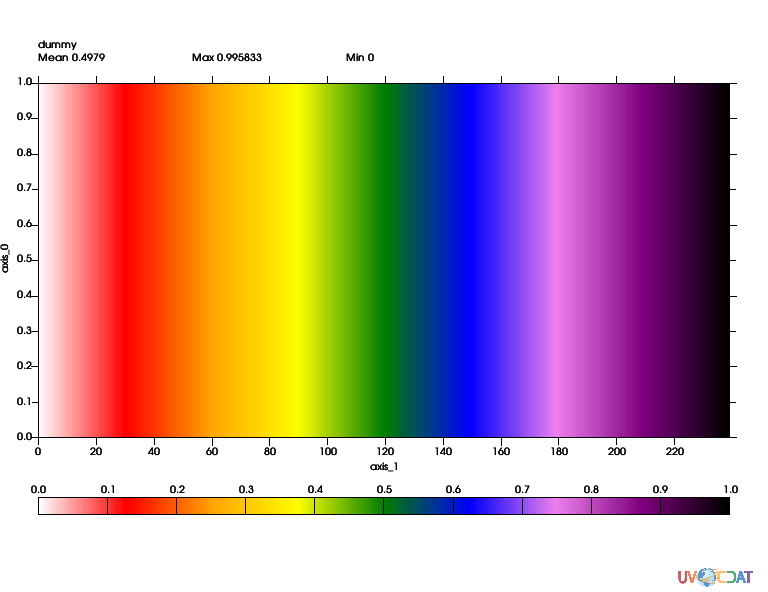

In [11]:
box = v.createboxfill()
box.color_1 = 0
box.color_2 = 239

box.colormap = 'cmap1'
v.plot(a,box)

### Example 2<a id='ex2'></a>
([back to top](#top))

- Define colors by using list of tuples of R, G, B numbers (0-1) 

In [12]:
cmap_name2 = 'cmap2'
colors2 = [(1,0,0),(1,1,1),(0,0,1)] # red, white, blue
CreateOwnColormap(cmap_name2, colors2)

* Visualize example 2

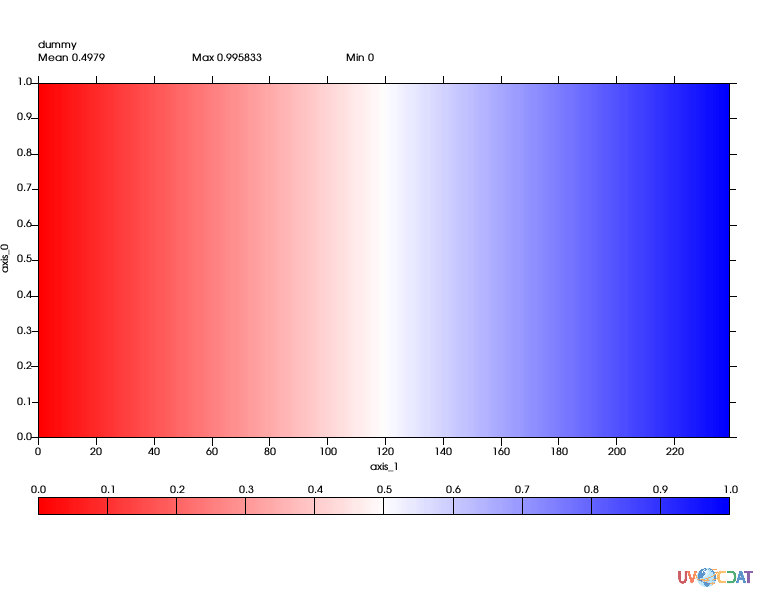

In [13]:
v.clear()
box.colormap = 'cmap2'
v.plot(a,box)

### Example 3<a id='ex3'></a>
([back to top](#top))

- Similar to example 1 but with more complicated set up. 

In [14]:
cmap_name3 = 'cmap3'
colors3 = ['white','lavender','royalblue','navy',
           'darkviolet','darkred','tomato','darkorange',
           'orange','yellow']
CreateOwnColormap(cmap_name3, colors3)

* Visualize example 3

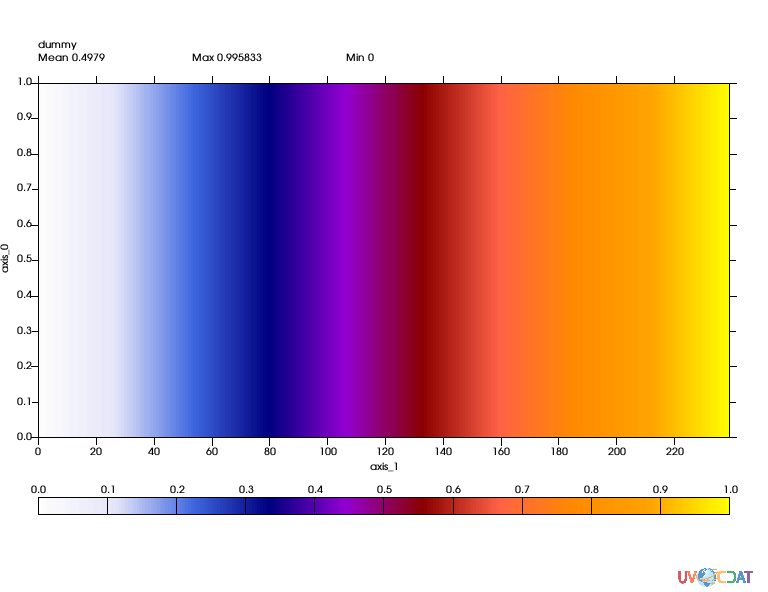

In [15]:
v.clear()
box.colormap = 'cmap3'
v.plot(a,box)

### Example 4<a id='ex4'></a>
([back to top](#top))

- Similar to example 2 but with more complicated set up. 

In [16]:
cmap_name4 = 'cmap4'

colors4 = [(99,93,60),
           (99,80,40),
           (99,60,20),
           (99,40,11),
           (99,0,0),
           (51,0,0),
           (44,11,62),
           (0,40,99),
           (20,60,99),
           (40,80,99),
           (60,93,99),
           (80,99,99),
          ]

colors4 = MV2.divide(colors4,100.) # Convert range 0-100 to 0-1

CreateOwnColormap(cmap_name4, colors4)

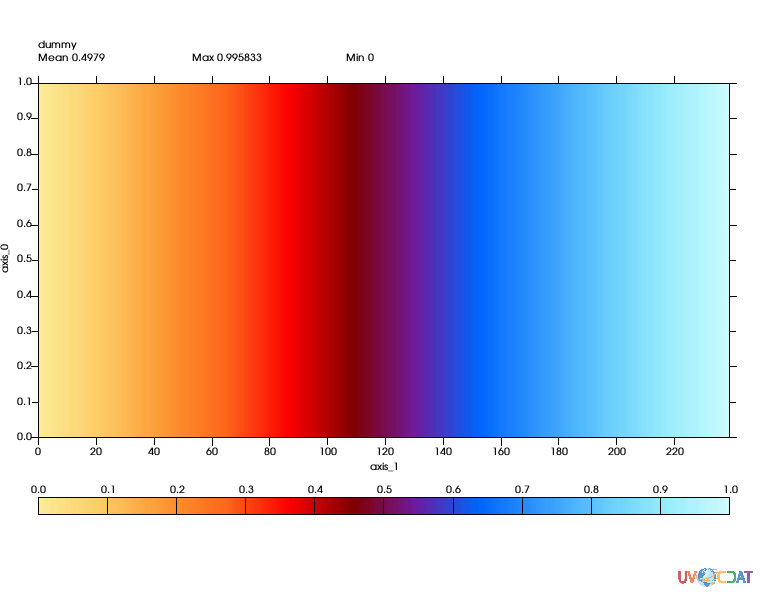

In [17]:
v.clear()
box.colormap = 'cmap4'
v.plot(a,box)